# Titanic Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('titanic.csv')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
df.corr().mean()

Survived   -0.011129
Pclass      0.108780
Sex         0.066700
Age         0.017554
SibSp       0.150346
Parch       0.153805
Embarked    0.169158
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

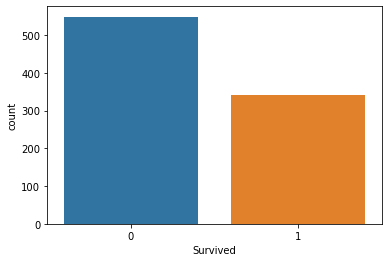

In [78]:
sns.countplot(x='Survived', data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Alone', ylabel='count'>

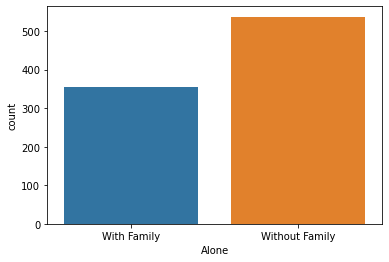

In [79]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
df['Alone'] = df.Parch + df.SibSp

## if Alone value is >0 then they are with family else they are Alone
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

sns.countplot(x=df['Alone'])

<AxesSubplot:ylabel='Sex'>

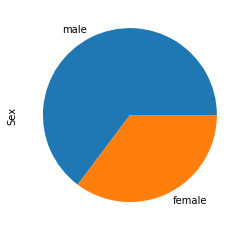

In [80]:
df['Sex'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Pclass'>

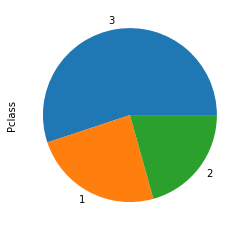

In [81]:
df['Pclass'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Survival ratio based on class')

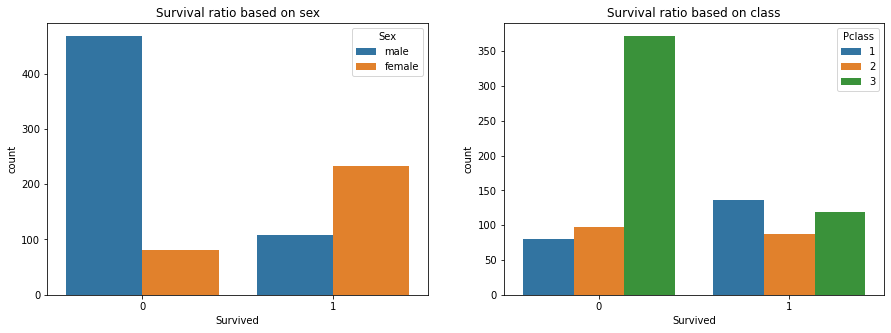

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.title('Survival ratio based on sex')

plt.subplot(1,2,2)
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.title('Survival ratio based on class')

# Data Cleaning

In [83]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Alone            0
dtype: int64

In [84]:
df.drop(['Cabin'],axis=1,inplace=True)

In [85]:
df.dropna(inplace=True)

In [86]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Alone          0
dtype: int64

In [87]:
df.drop(['PassengerId','Name','Ticket','Fare','Alone'],axis=1,inplace=True)

In [88]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])

le.fit(df['Embarked'])
df['Embarked'] = le.transform(df['Embarked'])

# Traning and test

In [91]:
from sklearn.model_selection import train_test_split

In [136]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.6,random_state=101)

# Model Building


1)Logistic Regression

<AxesSubplot:>

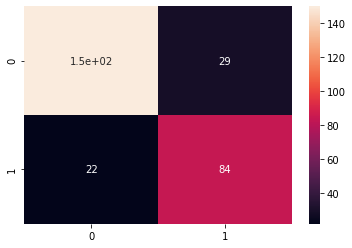

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

lg = LogisticRegression(max_iter=450)
lg.fit(x_train,y_train)
lg_predict = lg.predict(x_test)
lg_cm = confusion_matrix(lg_predict,y_test)
sns.heatmap(lg_cm,annot=True)

In [138]:
accuracy_score(y_test,lg_predict)

0.8210526315789474

2) K-Nearest Neighbor

<AxesSubplot:>

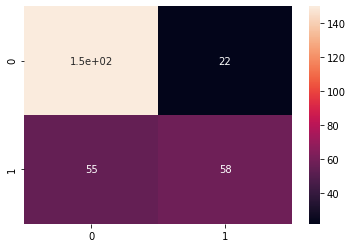

In [139]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn_predict = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_predict)
sns.heatmap(kn_cm,annot=True)

In [140]:
accuracy_score(y_test,kn_predict)

0.7298245614035088

3)Decision Tree

<AxesSubplot:>

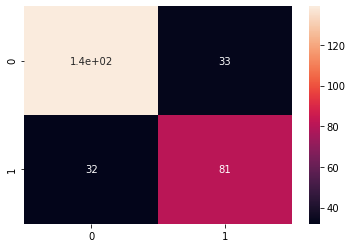

In [141]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_cm = confusion_matrix(y_test,dt_predict)
sns.heatmap(dt_cm,annot=True)

In [142]:
accuracy_score(y_test,dt_predict)

0.7719298245614035

4)Random Forest

<AxesSubplot:>

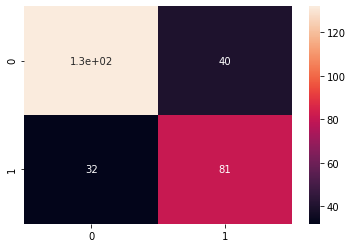

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_predict)
sns.heatmap(rf_cm,annot=True)

In [144]:
accuracy_score(y_test,rf_predict)

0.7473684210526316

5)Support Vector Machine

<AxesSubplot:>

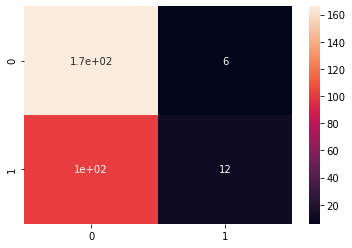

In [145]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_cm,annot=True)

In [146]:
accuracy_score(y_test,svm_predict)

0.624561403508772

So in all above Model LogisticRegression has the highest accuracy of 82%